In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking the shape
df.shape

(891, 12)

The dataset has 891 rows and 1 column

In [4]:
#checking the datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The columns, Name,Sex,Ticket,cabin and embarked are objects and the rest have numerical content.

In [5]:
#checking further into the non numerical columns
df['Name'].value_counts()


Giles, Mr. Frederick Edward                       1
Navratil, Mr. Michel ("Louis M Hoffman")          1
Lundahl, Mr. Johan Svensson                       1
Mannion, Miss. Margareth                          1
Goodwin, Master. William Frederick                1
                                                 ..
Petranec, Miss. Matilda                           1
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")      1
Cacic, Miss. Marija                               1
Ford, Mr. William Neal                            1
Spencer, Mrs. William Augustus (Marie Eugenie)    1
Name: Name, Length: 891, dtype: int64

The colunm, 'name' has the passenger names, which is irrelavant to the model

In [6]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

The column Sex has the gender classification of the passengers

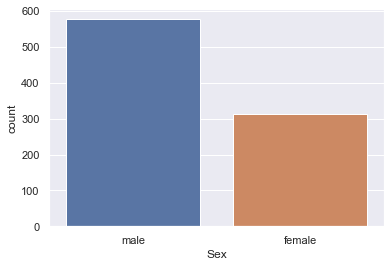

In [7]:
#plotting the Sex column.

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sex", data=df)

The count plot of the distribution in the sex column of the dataset

In [8]:
print(df['Cabin'].nunique())
print(df['Cabin'].unique())

147
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


147 unique values, the cabin has values ranging from A to F
Also shows there are NAn values

In [9]:
#checking embarked column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

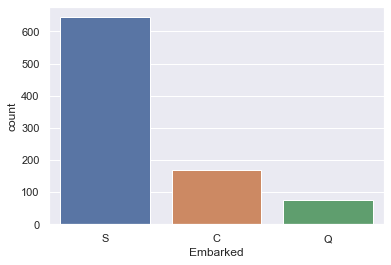

In [10]:
#plotting embarked
sns.countplot(x="Embarked", data=df)

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

The column can be ignored

<AxesSubplot:xlabel='Survived', ylabel='count'>

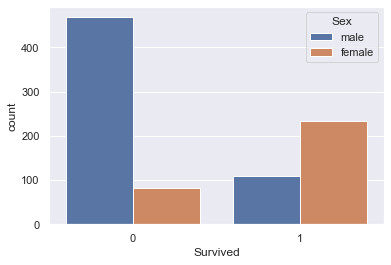

In [11]:
sns.countplot(x="Survived", hue="Sex", data=df)

The plot is showng that the majority of the people who survived the disaster where female

<AxesSubplot:xlabel='Survived', ylabel='count'>

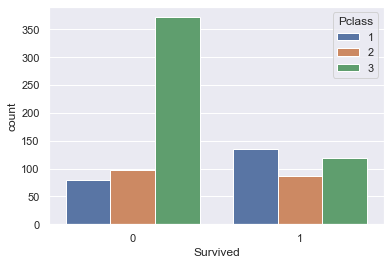

In [12]:
sns.countplot(x="Survived", hue="Pclass", data=df)

The people in the class 3 has died the most

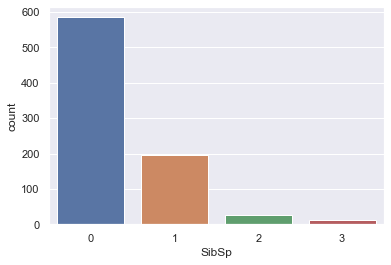

In [84]:
ax = sns.countplot(x = 'SibSp', data = df)

The data is showing the people who brought their siblings onboard

In [13]:
print(df['Ticket'].nunique())
print(df['PassengerId'].nunique())

681
891


The passenger ID is an index column and can be ignored

In [17]:
#droping the columns, passenger ID, Name, embarked and ticket
df.drop(['Ticket','PassengerId','Name','Embarked'],axis=1,inplace=True)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN


In [21]:
df['Cabin'].isnull().sum()

687

Majority of the rows in Cabin column is null, so can be ignored

In [22]:
df.drop(['Cabin'],inplace=True,axis=1)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [31]:
#checking the sibSp and Parch columns
print(df['SibSp'].nunique())
print(df['Parch'].nunique())

7
7


In [32]:
#checking the null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [33]:
#filling the Nan values
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

In [34]:
#encoding
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64


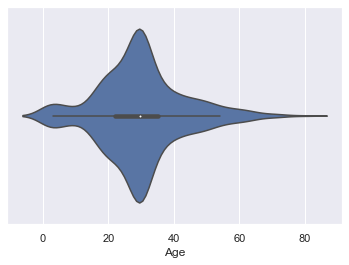

In [37]:
ax = sns.violinplot(x = 'Age', data = df)
print(df['Age'].value_counts())

The frequent age of the people on titanic between 20 and 40

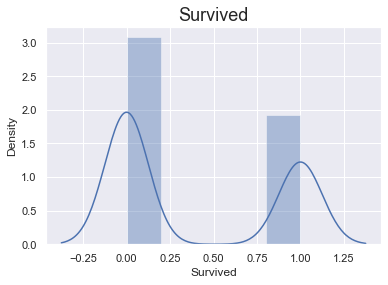

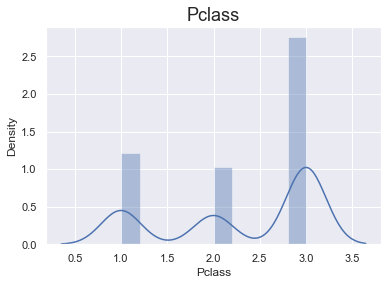

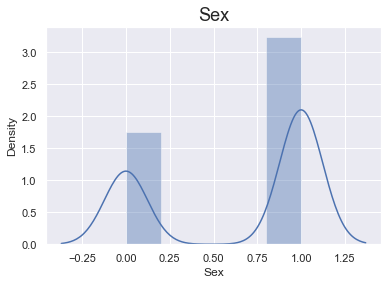

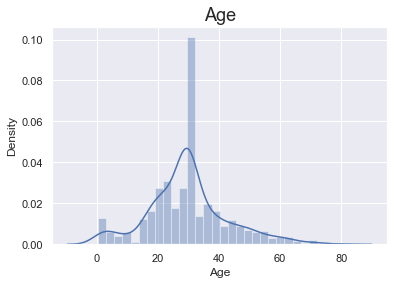

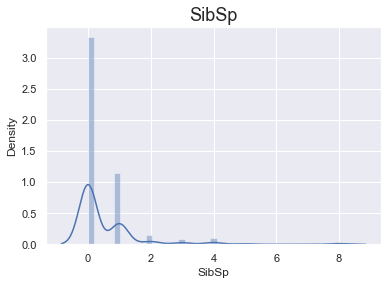

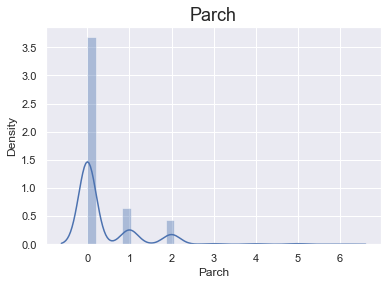

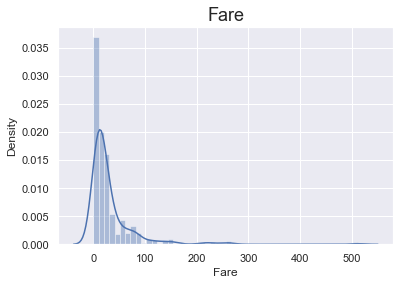

In [39]:
col = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

for i in col:
    sns.distplot(df[i], kde = True)
    plt.title(i, fontsize = 18)
    plt.show()

There is a skewness in the Fare column

<AxesSubplot:>

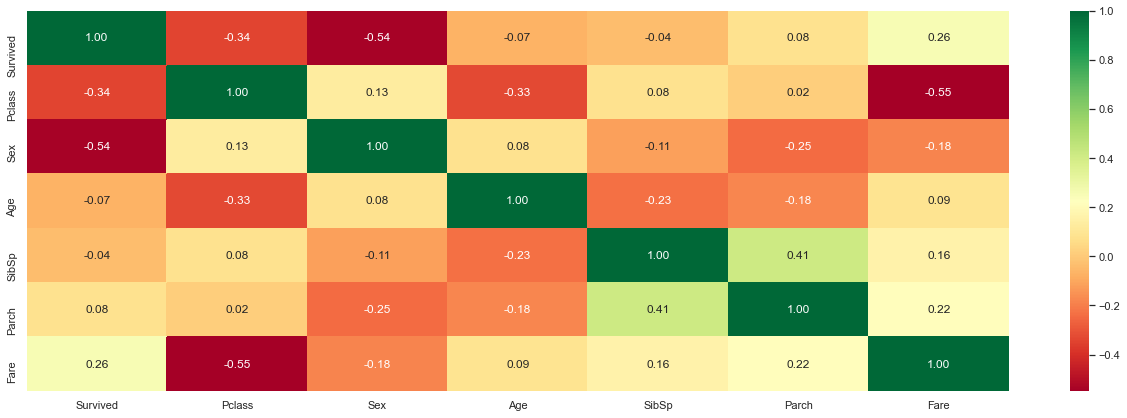

In [46]:

#Visualizing correlation using heatmap
plt.figure(figsize = (22,7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f',cmap='RdYlGn')

The column sex pclass has a negative correlation between the target column, the fare and parch columns indicates a possitive correlation

<AxesSubplot:xlabel='Fare'>

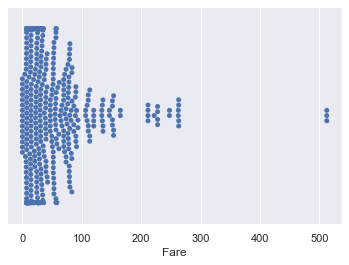

In [44]:
sns.swarmplot(x = 'Fare', data = df)

The Swarm plot is showing the presence of outliers in the dataset

<AxesSubplot:>

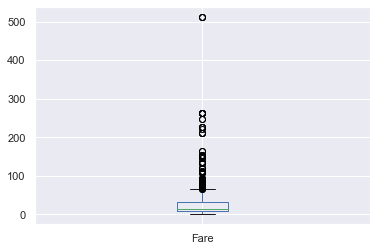

In [47]:
#checkimg fare column with boxplot
df['Fare'].plot.box()

Indicating outliers

In [48]:
#removing outliers
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold = 2
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
        5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5], dtype=int64))

In [49]:
df_new = df[(z<3).all(axis = 1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


We are removing the outliers as there is no significant data lose

In [53]:
df=df_new

In [60]:

x = df.iloc[:,1:]
y = df.iloc[:, 0]

In [61]:

x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [56]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [73]:

#Importing all the models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [74]:
lr=LogisticRegression()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test, predlr)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best accuracy',maxacc,'on random state',maxrs)

best accuracy 0.8414634146341463 on random state 189


In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 189)

In [68]:
x_train.shape

(574, 6)

In [69]:
x_test.shape

(246, 6)

In [70]:
y_train.shape

(574,)

In [71]:
y_test.shape

(246,)

In [76]:
def model(mod):
    print("Model:",mod)
    mod.fit(x_train, y_train)
    mod.score(x_train, y_train)
    pred = mod.predict(x_test)
    print(confusion_matrix(y_test, pred))
    print('\n')
    print('\n')
    print(classification_report(y_test, pred))
    crossval_scores = cross_val_score(mod, x, y, cv = 5)
    accuracy=accuracy_score(y_test, pred)
    print("Accuracy score:",accuracy)
    print('Cross validation Scores for ', mod)
    print(crossval_scores)
    print('\n')
    mean_crossval=crossval_scores.mean()
    print('Mean Score: ',mean_crossval)
    difference=accuracy-mean_crossval
    print('difference between crossvalidation score and actual score:',difference)

In [77]:
model(LogisticRegression())

Model: LogisticRegression()
[[148  20]
 [ 19  59]]




              precision    recall  f1-score   support

           0       0.89      0.88      0.88       168
           1       0.75      0.76      0.75        78

    accuracy                           0.84       246
   macro avg       0.82      0.82      0.82       246
weighted avg       0.84      0.84      0.84       246

Accuracy score: 0.8414634146341463
Cross validation Scores for  LogisticRegression()
[0.80487805 0.77439024 0.77439024 0.79268293 0.79878049]


Mean Score:  0.7890243902439025
difference between crossvalidation score and actual score: 0.05243902439024384


In [78]:
model(GaussianNB())

Model: GaussianNB()
[[139  29]
 [ 14  64]]




              precision    recall  f1-score   support

           0       0.91      0.83      0.87       168
           1       0.69      0.82      0.75        78

    accuracy                           0.83       246
   macro avg       0.80      0.82      0.81       246
weighted avg       0.84      0.83      0.83       246

Accuracy score: 0.8252032520325203
Cross validation Scores for  GaussianNB()
[0.68292683 0.79878049 0.76829268 0.79268293 0.7804878 ]


Mean Score:  0.7646341463414634
difference between crossvalidation score and actual score: 0.06056910569105689


In [79]:
model(RandomForestClassifier())


Model: RandomForestClassifier()
[[150  18]
 [ 18  60]]




              precision    recall  f1-score   support

           0       0.89      0.89      0.89       168
           1       0.77      0.77      0.77        78

    accuracy                           0.85       246
   macro avg       0.83      0.83      0.83       246
weighted avg       0.85      0.85      0.85       246

Accuracy score: 0.8536585365853658
Cross validation Scores for  RandomForestClassifier()
[0.75       0.81097561 0.84146341 0.77439024 0.82317073]


Mean Score:  0.8
difference between crossvalidation score and actual score: 0.05365853658536579


In [80]:

model(KNeighborsClassifier())

Model: KNeighborsClassifier()
[[136  32]
 [ 32  46]]




              precision    recall  f1-score   support

           0       0.81      0.81      0.81       168
           1       0.59      0.59      0.59        78

    accuracy                           0.74       246
   macro avg       0.70      0.70      0.70       246
weighted avg       0.74      0.74      0.74       246

Accuracy score: 0.7398373983739838
Cross validation Scores for  KNeighborsClassifier()
[0.61585366 0.68902439 0.73780488 0.7195122  0.71341463]


Mean Score:  0.6951219512195121
difference between crossvalidation score and actual score: 0.04471544715447162


In [81]:

model(DecisionTreeClassifier())

Model: DecisionTreeClassifier()
[[145  23]
 [ 21  57]]




              precision    recall  f1-score   support

           0       0.87      0.86      0.87       168
           1       0.71      0.73      0.72        78

    accuracy                           0.82       246
   macro avg       0.79      0.80      0.79       246
weighted avg       0.82      0.82      0.82       246

Accuracy score: 0.8211382113821138
Cross validation Scores for  DecisionTreeClassifier()
[0.70121951 0.79878049 0.84146341 0.75       0.7804878 ]


Mean Score:  0.774390243902439
difference between crossvalidation score and actual score: 0.0467479674796748


In [82]:
k=['linear','poly','rbf']
for i in k:
    print('\n')
    print('SVC kernel:',i)
    print('\n')
    svc=SVC(kernel=i)
    model(svc)



SVC kernel: linear


Model: SVC(kernel='linear')
[[150  18]
 [ 22  56]]




              precision    recall  f1-score   support

           0       0.87      0.89      0.88       168
           1       0.76      0.72      0.74        78

    accuracy                           0.84       246
   macro avg       0.81      0.81      0.81       246
weighted avg       0.84      0.84      0.84       246

Accuracy score: 0.8373983739837398
Cross validation Scores for  SVC(kernel='linear')
[0.80487805 0.79878049 0.76829268 0.78658537 0.79878049]


Mean Score:  0.7914634146341464
difference between crossvalidation score and actual score: 0.04593495934959346


SVC kernel: poly


Model: SVC(kernel='poly')
[[162   6]
 [ 66  12]]




              precision    recall  f1-score   support

           0       0.71      0.96      0.82       168
           1       0.67      0.15      0.25        78

    accuracy                           0.71       246
   macro avg       0.69      0.56      0.53     

In [83]:
model(AdaBoostClassifier())

Model: AdaBoostClassifier()
[[142  26]
 [ 16  62]]




              precision    recall  f1-score   support

           0       0.90      0.85      0.87       168
           1       0.70      0.79      0.75        78

    accuracy                           0.83       246
   macro avg       0.80      0.82      0.81       246
weighted avg       0.84      0.83      0.83       246

Accuracy score: 0.8292682926829268
Cross validation Scores for  AdaBoostClassifier()
[0.76829268 0.78658537 0.79878049 0.79268293 0.84756098]


Mean Score:  0.7987804878048781
difference between crossvalidation score and actual score: 0.030487804878048697


ADA boost classifier has the best accuracy based on cross validation difference

#### Hyper Parameter Tuning

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
parameters = {'algorithm':['SAMME.R', 'SAMME'], 'n_estimators':[10, 50, 100]}
abc = AdaBoostClassifier()
gscv = GridSearchCV(abc, parameters)
gscv.fit(x_train, y_train)

print(gscv.best_params_)

{'algorithm': 'SAMME', 'n_estimators': 100}


In [88]:

abc_final = AdaBoostClassifier(algorithm = 'SAMME', n_estimators = 100)
abc_final.fit(x_train, y_train)
pred_abc = abc_final.predict(x_test)
print('Accuracy Score  : ', abc_final)
print(accuracy_score(y_test, pred_abc))
print(confusion_matrix(y_test, pred_abc))
print(classification_report(y_test, pred_abc))

Accuracy Score  :  AdaBoostClassifier(algorithm='SAMME', n_estimators=100)
0.8333333333333334
[[142  26]
 [ 15  63]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       168
           1       0.71      0.81      0.75        78

    accuracy                           0.83       246
   macro avg       0.81      0.83      0.81       246
weighted avg       0.84      0.83      0.84       246



### Importing the model

In [89]:
import joblib
joblib.dump(abc_final, 'Titanic.obj')
final = joblib.load('Titanic.obj')
final.predict(x_train)


array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,